In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\brend\Desktop\REPROGRAMA\semana12\on33-python-s10-pandas-numpy-II\material\Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
None


In [3]:
print(df.isnull().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [4]:
print(df.duplicated().sum())

1889


In [5]:
print(df.drop_duplicates(inplace=True))

None


In [6]:
print(df.duplicated().sum())

0


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB
None


In [8]:
print(df.describe())

       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  2764.000000  2764.000000  2764.000000                2764.000000   
mean   2015.090449     2.636035    30.952967                   2.644356   
std       1.885943     0.624001     5.108872                   1.610610   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     2.000000    27.000000                   1.000000   
50%    2015.000000     3.000000    30.000000                   2.000000   
75%    2017.000000     3.000000    35.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  2764.000000  
mean      0.393632  
std       0.488643  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


In [10]:
import datetime as dt

In [11]:
current_year = dt.date.today().year
five_years_ago = current_year - 5
filtered_df = df[(df["JoiningYear"] <= five_years_ago)]
print(filtered_df.describe())

       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  2764.000000  2764.000000  2764.000000                2764.000000   
mean   2015.090449     2.636035    30.952967                   2.644356   
std       1.885943     0.624001     5.108872                   1.610610   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     2.000000    27.000000                   1.000000   
50%    2015.000000     3.000000    30.000000                   2.000000   
75%    2017.000000     3.000000    35.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  2764.000000  
mean      0.393632  
std       0.488643  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


In [12]:
import matplotlib.pyplot as plt

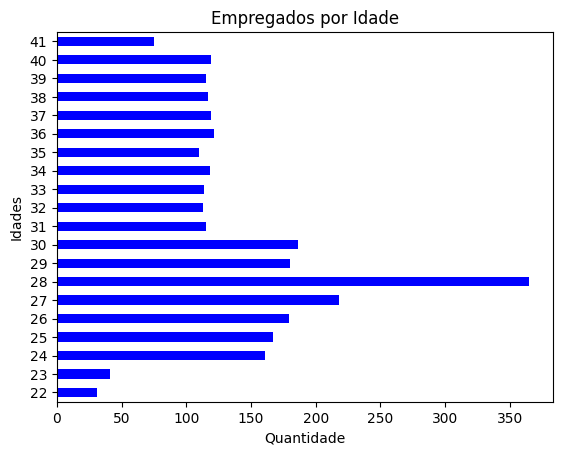

In [14]:
df["Age"].value_counts().sort_index().plot(kind="barh", title="Empregados por Idade", xlabel="Quantidade", ylabel="Idades", color="blue")
plt.show()

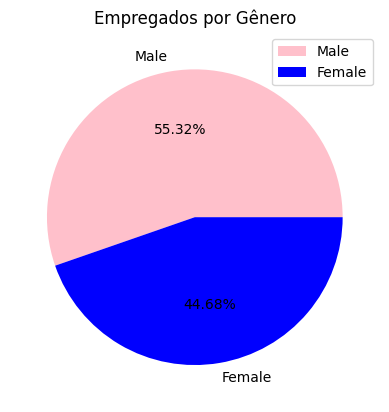

In [16]:
df["Gender"].value_counts().plot(kind="pie", title="Empregados por Gênero", colors=["pink", "blue"], autopct="%.2f%%")
plt.ylabel("")
plt.legend()
plt.show()

In [18]:
most_employees_city = df["City"].max()
print("Cidade com maior número de colaboradores:", most_employees_city)

Cidade com maior número de colaboradores: Pune


In [19]:
df["LenghtService"] = current_year - df["JoiningYear"]
lenght_service_mean_by_city = df.groupby(["City"])["LenghtService"].mean()
print(lenght_service_mean_by_city)

City
Bangalore    9.076003
New Delhi    8.631313
Pune         8.941323
Name: LenghtService, dtype: float64


In [20]:
total_employees = len(df)
not_working = df["LeaveOrNot"].value_counts()
not_working_pct = (not_working / total_employees) * 100
print(f"Em {current_year} cerca de {not_working_pct[0]:.2f}% dos empregados ainda trabalham na empresa.")

Em 2024 cerca de 60.64% dos empregados ainda trabalham na empresa.


In [21]:
empolyees = len(df["PaymentTier"]) - not_working[1]
print(f"Atualmente existem {empolyees} empregados na empresa.")

Atualmente existem 1676 empregados na empresa.


In [22]:
def convertion(value):
    if value == "Yes":
        return True
    if value == "No":
        return False
    else:
        return "Não categorizado"

df["EverBenched"] = df["EverBenched"].apply(convertion)
print(df["EverBenched"])

0       False
1       False
2       False
3       False
4        True
        ...  
4645    False
4647    False
4649    False
4650    False
4651     True
Name: EverBenched, Length: 2764, dtype: bool


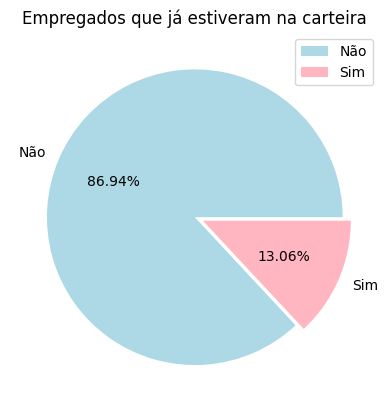

In [28]:
df["EverBenched"].value_counts().plot(kind="pie", title="Empregados que já estiveram na carteira", labels=["Não", "Sim"], colors=["lightblue", "lightpink"], autopct="%.2f%%", explode=[0, 0.06])
plt.ylabel("")
plt.legend()
plt.show()

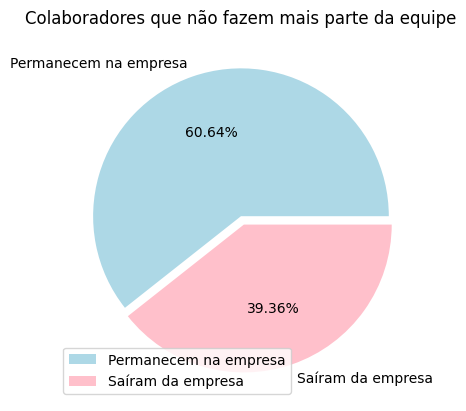

In [31]:
df["LeaveOrNot"].value_counts().plot(kind="pie", title="Colaboradores que não fazem mais parte da equipe", labels=["Permanecem na empresa", "Saíram da empresa"], colors=["lightblue", "pink"], autopct="%.2f%%", explode=[0, 0.06])
plt.ylabel("")
plt.legend()
plt.show()